In [1]:
import numpy as np

In [2]:
%matplotlib inline

In [3]:
from os import listdir
from os.path import isfile, join
plain_file_path = "/hdd/Documents/Data/IKEA_PAIR/CAD_Plain/"
plain_files = [join(plain_file_path, f) for f in listdir(plain_file_path) if isfile(join(plain_file_path, f))]
plain_file_label = [f.split('_')[1] for f in listdir(plain_file_path)]
texture_file_path = '/hdd/Documents/Data/IKEA_PAIR/CAD_Texture/'
texture_files = [join(texture_file_path, f) for f in listdir(texture_file_path) if isfile(join(texture_file_path, f))]
texture_file_label = [f.split('_')[1] for f in listdir(texture_file_path)]

In [4]:
np.unique(texture_file_label)

array(['bed', 'bookcase', 'chair', 'desk', 'sofa', 'table', 'wardrobe'],
      dtype='|S8')

In [5]:
all_classes = np.unique(plain_file_label).tolist()

In [6]:
for item in all_classes:
    count = np.sum(np.array(plain_file_label) == item)
    print(item, count)

('bed', 22)
('bookcase', 20)
('chair', 37)
('desk', 27)
('sofa', 21)
('table', 68)
('wardrobe', 23)


In [7]:
len(plain_file_label)

218

In [8]:
# Source => Target = (BGColor + Source) =
# Target.R = ((1 - Source.A) * BGColor.R) + (Source.A * Source.R)
# Target.G = ((1 - Source.A) * BGColor.G) + (Source.A * Source.G)
# Target.B = ((1 - Source.A) * BGColor.B) + (Source.A * Source.B)

from scipy import misc
plain_images = []
for f in plain_files:
    image = misc.imread(f)
    mask = np.array(np.product(image, axis = 2) == 237 * 237 * 255 * 255).reshape(500,500,1)
    mask_all = np.repeat(mask, 3, axis = 2)
    
    image = image / 255.0
    bgcolor = np.array([237, 237, 255]).reshape(1, 1, 3) / 255.0
    new_image = np.zeros((500, 500, 3))
    new_image[:,:,0] = (1 - image[:,:,3]) * image[:,:,0] + image[:,:,3] * image[:,:,0]
    new_image[:,:,1] = (1 - image[:,:,3]) * image[:,:,1] + image[:,:,3] * image[:,:,1]
    new_image[:,:,2] = (1 - image[:,:,3]) * image[:,:,2] + image[:,:,3] * image[:,:,2]
    new_image = bgcolor * mask_all + new_image * (1 - mask_all)
    plain_images.append(new_image)
plain_images = np.asarray(plain_images)

In [9]:
np.repeat(mask.reshape(500,500,1),3, axis = 2).shape

(500, 500, 3)

In [10]:
texture_images = []
for f in texture_files:
    image = misc.imread(f)
    mask = np.array(np.product(image, axis = 2) == 237 * 237 * 255 * 255).reshape(500,500,1)
    mask_all = np.repeat(mask, 3, axis = 2)
    
    image = image / 255.0
    bgcolor = np.array([237, 237, 255]).reshape(1, 1, 3) / 255.0
    new_image = np.zeros((500, 500, 3))
    new_image[:,:,0] = (1 - image[:,:,3]) * image[:,:,0] + image[:,:,3] * image[:,:,0]
    new_image[:,:,1] = (1 - image[:,:,3]) * image[:,:,1] + image[:,:,3] * image[:,:,1]
    new_image[:,:,2] = (1 - image[:,:,3]) * image[:,:,2] + image[:,:,3] * image[:,:,2]
    new_image = bgcolor * mask_all + new_image * (1 - mask_all)
    texture_images.append(new_image)
texture_images = np.asarray(texture_images)

In [11]:
show_image = np.zeros((1000, 5000, 3), dtype =np.float32)
for i in range(10):
    show_image[:500, i * 500:i * 500 + 500] = plain_images[i][:,:,:]
    show_image[500:1000, i * 500:i * 500 + 500] = texture_images[i][:,:,:]

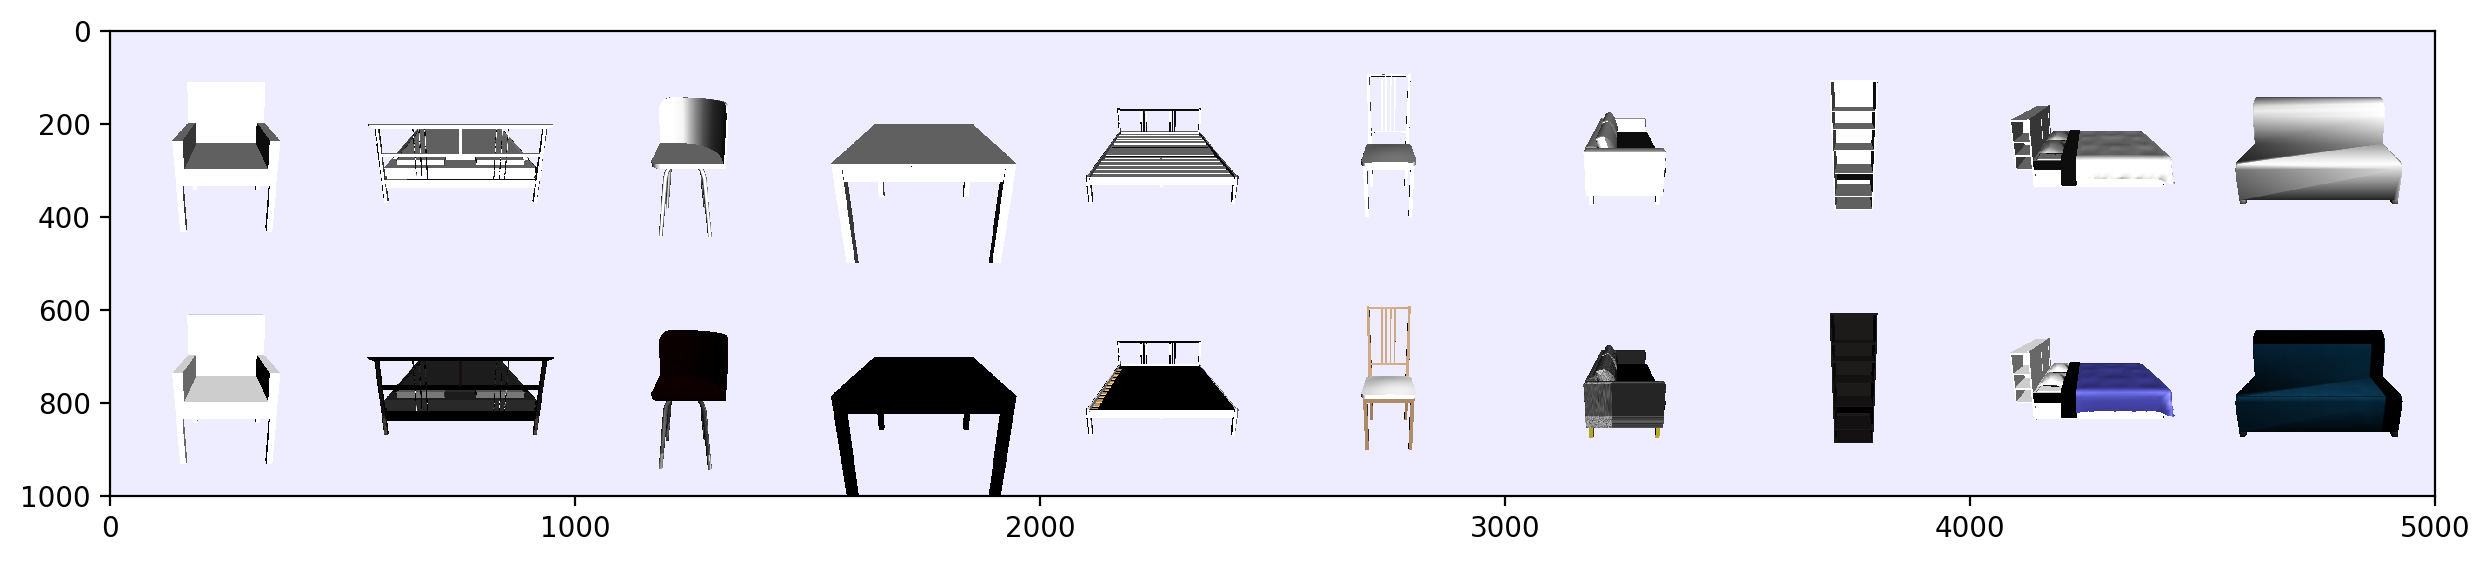

In [12]:
import matplotlib.pylab as plt
plt.figure(figsize=(15,20),dpi=200)

plt.imshow(show_image)

In [13]:
training_index = []
testing_index = []
for item in all_classes:
    index_list = np.where(np.asarray(plain_file_label) == item)[0].tolist()
    amount = len(index_list)
    training_index += index_list[:amount // 3 * 2]
    testing_index += index_list[amount // 3 * 2:]
    

In [23]:
len(testing_index)

78

In [14]:
len(training_index) + len(testing_index)

218

In [15]:
training_plain_img = plain_images[training_index]
testing_plain_img = plain_images[testing_index]

In [16]:
training_texture_img = texture_images[training_index]
testing_texture_img = texture_images[testing_index]

In [17]:
label_dictionary = {}
for i in range(7):
    label_dictionary[all_classes[i]] = i

In [18]:
label_dictionary

{'bed': 0,
 'bookcase': 1,
 'chair': 2,
 'desk': 3,
 'sofa': 4,
 'table': 5,
 'wardrobe': 6}

In [19]:
all_labels = []
for item in plain_file_label:
    all_labels.append(label_dictionary[item])

In [20]:
plain_file_label

['chair',
 'bed',
 'chair',
 'table',
 'bed',
 'chair',
 'sofa',
 'bookcase',
 'bed',
 'sofa',
 'bookcase',
 'desk',
 'bed',
 'table',
 'chair',
 'wardrobe',
 'wardrobe',
 'table',
 'table',
 'sofa',
 'table',
 'chair',
 'table',
 'table',
 'chair',
 'chair',
 'bookcase',
 'chair',
 'table',
 'desk',
 'bookcase',
 'table',
 'table',
 'bookcase',
 'chair',
 'bookcase',
 'sofa',
 'wardrobe',
 'chair',
 'table',
 'table',
 'chair',
 'table',
 'desk',
 'desk',
 'table',
 'wardrobe',
 'chair',
 'chair',
 'table',
 'desk',
 'wardrobe',
 'table',
 'table',
 'sofa',
 'table',
 'chair',
 'wardrobe',
 'bed',
 'chair',
 'desk',
 'wardrobe',
 'table',
 'table',
 'chair',
 'wardrobe',
 'table',
 'bed',
 'table',
 'table',
 'table',
 'bookcase',
 'wardrobe',
 'chair',
 'bookcase',
 'desk',
 'chair',
 'table',
 'wardrobe',
 'chair',
 'chair',
 'bookcase',
 'desk',
 'chair',
 'table',
 'bookcase',
 'table',
 'table',
 'bookcase',
 'desk',
 'chair',
 'wardrobe',
 'table',
 'wardrobe',
 'table',
 'chair

In [21]:
np.asarray(all_labels)[training_index]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6])

In [22]:
np.save("/hdd/Documents/Data/IKEA_PAIR/X_plain_train.npy", training_plain_img)
np.save("/hdd/Documents/Data/IKEA_PAIR/X_texture_train.npy", training_texture_img)
np.save("/hdd/Documents/Data/IKEA_PAIR/X_plain_test.npy", testing_plain_img)
np.save("/hdd/Documents/Data/IKEA_PAIR/X_texture_test.npy", testing_texture_img)
np.save("/hdd/Documents/Data/IKEA_PAIR/Y_train.npy", np.asarray(all_labels)[training_index])
np.save("/hdd/Documents/Data/IKEA_PAIR/Y_test.npy", np.asarray(all_labels)[testing_index])

In [24]:
show_image

array([[[ 0.92941177,  0.92941177,  1.        ],
        [ 0.92941177,  0.92941177,  1.        ],
        [ 0.92941177,  0.92941177,  1.        ],
        ..., 
        [ 0.92941177,  0.92941177,  1.        ],
        [ 0.92941177,  0.92941177,  1.        ],
        [ 0.92941177,  0.92941177,  1.        ]],

       [[ 0.92941177,  0.92941177,  1.        ],
        [ 0.92941177,  0.92941177,  1.        ],
        [ 0.92941177,  0.92941177,  1.        ],
        ..., 
        [ 0.92941177,  0.92941177,  1.        ],
        [ 0.92941177,  0.92941177,  1.        ],
        [ 0.92941177,  0.92941177,  1.        ]],

       [[ 0.92941177,  0.92941177,  1.        ],
        [ 0.92941177,  0.92941177,  1.        ],
        [ 0.92941177,  0.92941177,  1.        ],
        ..., 
        [ 0.92941177,  0.92941177,  1.        ],
        [ 0.92941177,  0.92941177,  1.        ],
        [ 0.92941177,  0.92941177,  1.        ]],

       ..., 
       [[ 0.92941177,  0.92941177,  1.        ],
        

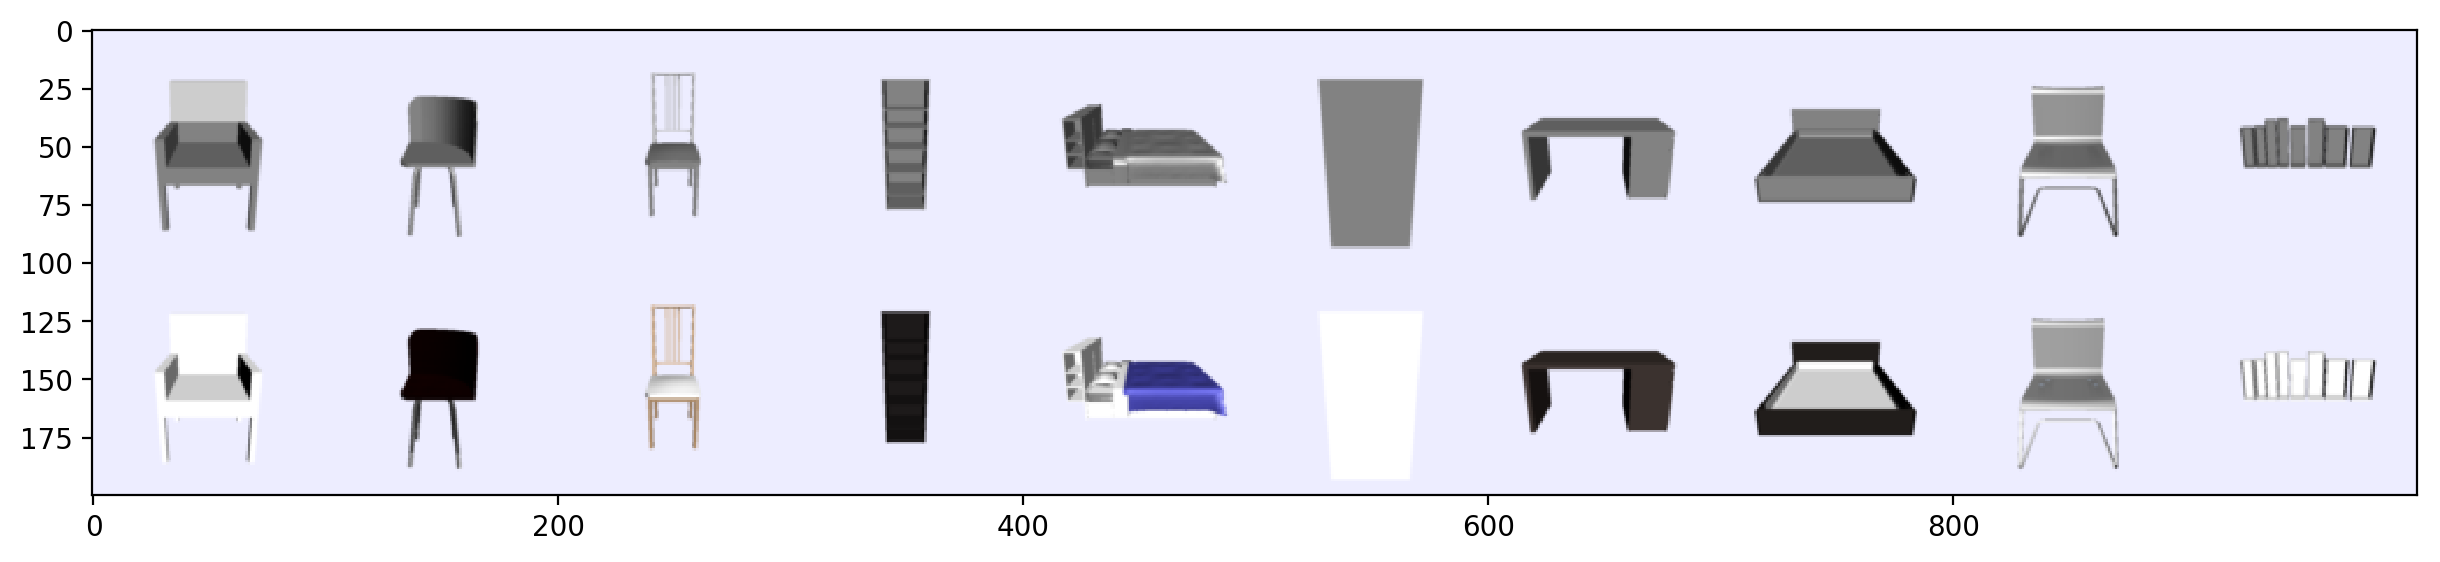

In [25]:
plt.figure(figsize=(15,20),dpi=200)

plt.imshow(misc.imresize(show_image,size = (200,1000,3)) / 255.0)

In [26]:
show_image.shape

(1000, 5000, 3)

In [27]:
training_plain_img

array([[[[ 0.92941176,  0.92941176,  1.        ],
         [ 0.92941176,  0.92941176,  1.        ],
         [ 0.92941176,  0.92941176,  1.        ],
         ..., 
         [ 0.92941176,  0.92941176,  1.        ],
         [ 0.92941176,  0.92941176,  1.        ],
         [ 0.92941176,  0.92941176,  1.        ]],

        [[ 0.92941176,  0.92941176,  1.        ],
         [ 0.92941176,  0.92941176,  1.        ],
         [ 0.92941176,  0.92941176,  1.        ],
         ..., 
         [ 0.92941176,  0.92941176,  1.        ],
         [ 0.92941176,  0.92941176,  1.        ],
         [ 0.92941176,  0.92941176,  1.        ]],

        [[ 0.92941176,  0.92941176,  1.        ],
         [ 0.92941176,  0.92941176,  1.        ],
         [ 0.92941176,  0.92941176,  1.        ],
         ..., 
         [ 0.92941176,  0.92941176,  1.        ],
         [ 0.92941176,  0.92941176,  1.        ],
         [ 0.92941176,  0.92941176,  1.        ]],

        ..., 
        [[ 0.92941176,  0.92941176,